<a href="https://colab.research.google.com/github/ubsuny/PHY386/blob/Homework2025/2025/HW/JDRath/FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1:
- Load the image and inspect its contents.
- Display the image with appropriate contrast and scaling to highlight crater features.
- Highlight a few prominent craters by marking their rims or centers.
- Generate a histogram of pixel brightness values to understand the contrast and surface texture.

Total frames in video: 12539


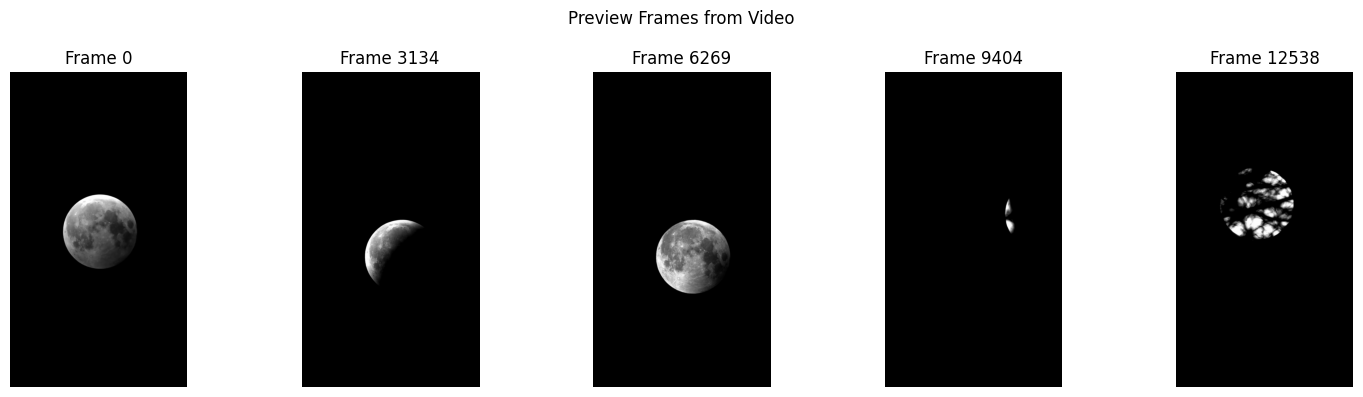

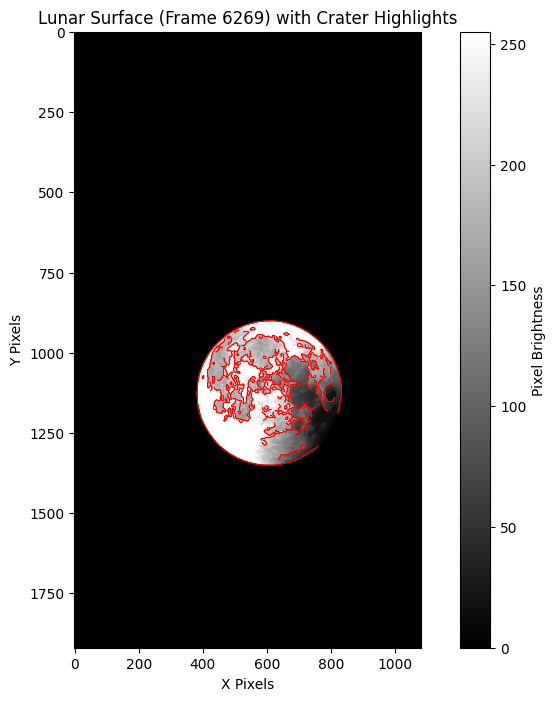

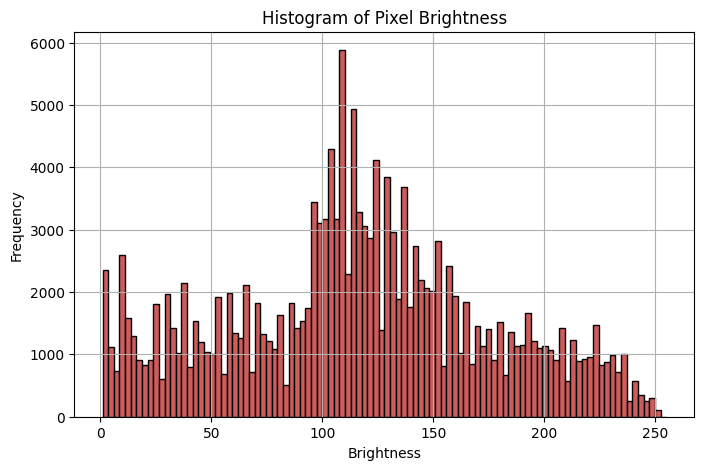

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import exposure, feature

# Step 1: Define utility functions

def load_video(path):
    """
    Loads a video file from the specified path.

    Parameters:
        path: Path to the video file.

    Returns:
        cap: OpenCV video capture object.
        total_frames: Total number of frames in the video.
    """
    cap = cv2.VideoCapture(path)
    if not cap.isOpened():
        raise IOError("Error: Cannot open video file.")
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    return cap, total_frames


def preview_video_frames(cap, frame_indices):
    """
    Previews a selection of grayscale frames from the video.

    Parameters:
        cap: OpenCV video capture object.
        frame_indices: List of frame indices to preview.
    """
    plt.figure(figsize=(15, 4))
    for i, idx in enumerate(frame_indices):
        cap.set(cv2.CAP_PROP_POS_FRAMES, idx)
        ret, frame = cap.read()
        if ret:
            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            plt.subplot(1, len(frame_indices), i + 1)
            plt.imshow(gray, cmap='gray')
            plt.title(f"Frame {idx}")
            plt.axis('off')
        else:
            print(f"Warning: Could not read frame {idx}")
    plt.suptitle("Preview Frames from Video")
    plt.tight_layout()
    plt.show()


def enhance_contrast(image):
    """
    Enhances the contrast of a grayscale image using percentile scaling.

    Parameters:
        image: Input grayscale image.

    Returns:
        image: Contrast-enhanced image.
    """
    p2, p98 = np.percentile(image, (2, 98))
    return exposure.rescale_intensity(image, in_range=(p2, p98))


def detect_edges(image, sigma=2):
    """
    Detects edges using the Canny edge detection algorithm.

    Parameters:
        image: Input grayscale or enhanced image.
        sigma: Standard deviation for the Gaussian filter.

    Returns:
        image: Binary image showing detected edges.
    """
    return feature.canny(image, sigma=sigma)


def display_crater_overlay(enhanced, edges, frame_index):
    """
    Displays the enhanced image with crater edges overlaid.

    Parameters:
        enhanced: Contrast-enhanced grayscale image.
        edges: Binary edge map from Canny detector.
        frame_index: Index of the frame being displayed.
    """
    plt.figure(figsize=(10, 8))
    im = plt.imshow(enhanced, cmap='gray', vmin=enhanced.min(), vmax=enhanced.max())
    plt.contour(edges, colors='red', linewidths=0.5)
    plt.title(f"Lunar Surface (Frame {frame_index}) with Crater Highlights")
    plt.xlabel("X Pixels")
    plt.ylabel("Y Pixels")
    plt.colorbar(im, label="Pixel Brightness")
    plt.show()


def plot_brightness_histogram(gray_image):
    """
    Plots a histogram of pixel brightness values for a grayscale image.

    Parameters:
        gray_image: Grayscale image.
    """
    plt.figure(figsize=(8, 5))
    plt.hist(gray_image.flatten(), bins=100, color='indianred', edgecolor='black', range=(1, 255))
    plt.title("Histogram of Pixel Brightness")
    plt.xlabel("Brightness")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()

# Step 2: Main analysis

# Path to the video file
video_path = "/moon.mp4"

# Load video and get total number of frames
cap, total_frames = load_video(video_path)
print(f"Total frames in video: {total_frames}")

"""
Preview several frames spread across the video to understand image quality,
lighting, and consistency. This helps decide which frame to analyze.
"""
preview_indices = [0, total_frames // 4, total_frames // 2, 3 * total_frames // 4, total_frames - 1]
preview_video_frames(cap, preview_indices)

"""
Choose the middle frame of the video as the best candidate for analysis.
This is based on the fact that it is clear and focused.
"""
best_frame_index = total_frames // 2
cap.set(cv2.CAP_PROP_POS_FRAMES, best_frame_index)
ret, frame = cap.read()

if not ret:
    print("Error: Failed to read the selected frame.")
else:
    """
    Convert the selected frame to grayscale for simplified intensity analysis.
    We do not need color information is unnecessary for crater detection.
    """
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    """
    Apply contrast enhancement to improve visibility of surface details.
    Useful for highlighting crater rims and shadowed regions.
    """
    enhanced = enhance_contrast(gray)

    """
    Detect edges in the enhanced image using the Canny method.
    This step finds sharp boundaries, which may correspond to crater edges.
    """
    edges = detect_edges(enhanced)

    """
    Overlay the detected crater edges on top of the enhanced image
    to visually confirm crater features and validate detection quality.
    """
    display_crater_overlay(enhanced, edges, best_frame_index)

    """
    Plot the histogram of grayscale pixel brightness values.
    This provides insight into surface, lighting, and contrast.
    """
    plot_brightness_histogram(gray)

# Release the video file resource after processing
cap.release()

#Task 2:
- Explain how craters are formed on the lunar surface and why their sizes vary.
- Discuss how crater counting and size distribution can be used to estimate the relative ages of different lunar regions.
- Describe what factors influence the preservation or erosion of craters on airless bodies like the Moon.

- Explain how craters are formed on the lunar surface and why their sizes vary.
  - Lunar craters are formed when asteroids or meteoroids traveling at high speeds collide with the Moon's surface. These impacts release huge amounts of energy, blasting out material and leaving behind round impressions.
  - The size of a crater depends on several things:
    - size and speed of the incoming object.
    - The angle at which it hits the surface.
    - The type of rock or surface material where the impact happens.
  
- Discuss how crater counting and size distribution can be used to estimate the relative ages of different lunar regions.
  - Craters are like a record of time on the Moon. Since the Moon has no atmosphere, craters stay visible for millions or even billions of years.
    - Older surfaces have more craters, especially large ones.
    - Younger surfaces have fewer craters, because lava flows or other activity may have covered older ones.

  - By counting craters in an area and measuring their sizes, scientists can estimate how long that surface has been exposed. This method is called crater counting and is used to compare the relative ages of different regions on the Moon.

- Describe what factors influence the preservation or erosion of craters on airless bodies like the Moon.
  - Since the Moon has no air, wind, or water, craters don't erode the same way they do on Earth. But other factors can affect crater preservation, such as:
    - Micrometeorite impacts that slowly wear down crater rims over time.
    - Thermal cycling from extreme temperature changes between day and night, which can crack and break rocks.
    - Lava flows from ancient volcanoes that can bury old craters.
    - Dust movement caused by small impacts can also slightly change the surface.
  - Because these processes are slow, most craters stay preserved for a very long time.

# Task 3:
- Apply image processing techniques to enhance the visibility of crater rims (e.g., edge detection or contrast enhancement).
- Identify and mark craters in the image manually or semi-automatically.
- Measure the diameter of each crater in pixel units and convert to physical units.
- Plot a histogram of crater sizes to show their distribution.
- Create an additional figure showing a spatial map of crater locations and sizes overlaid on the lunar image.

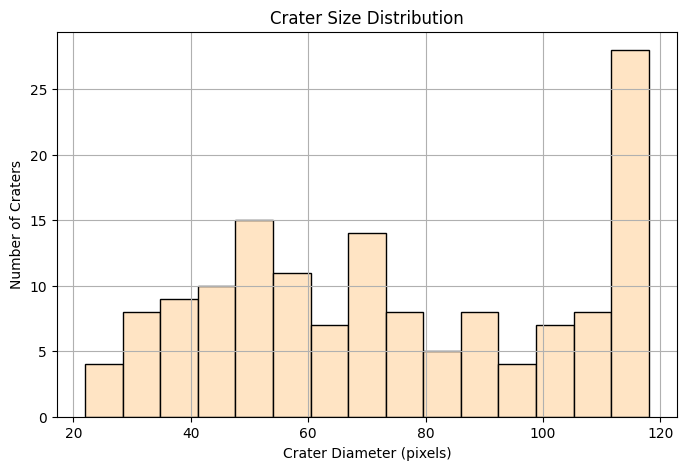

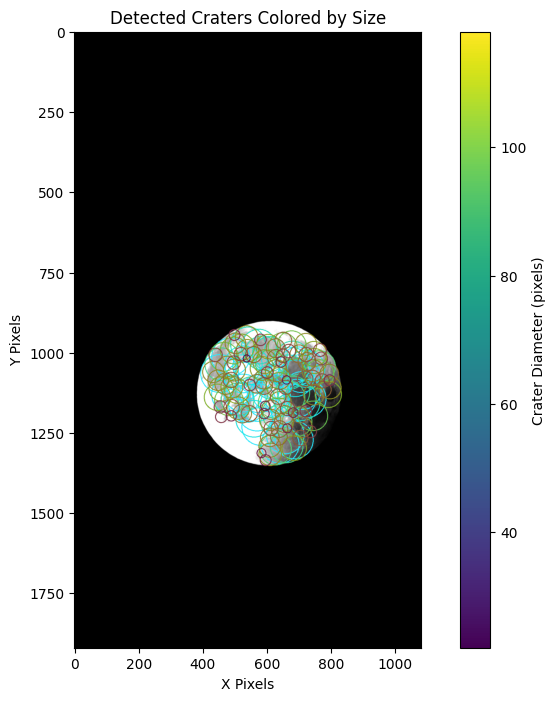

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import exposure, feature

# Path to your video
video_path = "/moon.mp4"

# Open the video file
cap = cv2.VideoCapture(video_path)

"""
Open the video and check if it's accessible.
This ensures we can read frames for processing.
"""
if not cap.isOpened():
    print("Error: Cannot open video file.")
else:
    """
    Get the total number of frames and choose the middle one.
    This is based on the fact that it is clear and focused.
    """
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    best_frame_index = total_frames // 2
    cap.set(cv2.CAP_PROP_POS_FRAMES, best_frame_index)
    ret, frame = cap.read()

    """
    If frame reading fails, notify the user.
    """
    if not ret:
        print("Error reading frame.")
    else:
        """
        Convert the selected frame to grayscale.
        This simplifies processing by removing color information.
        """
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        """
        Improve contrast using percentile-based rescaling.
        This enhances visibility of surface features like craters.
        """
        p2, p98 = np.percentile(gray, (2, 98))
        enhanced = exposure.rescale_intensity(gray, in_range=(p2, p98))

        """
        Apply a blur to reduce noise before circle detection.
        This helps avoid false positives in circle transform.
        """
        img_blur = cv2.medianBlur(enhanced, 5)

        """
        Detect circles using the circle transform.
        This is used to identify circular features that resemble craters.
        """
        circles = cv2.HoughCircles(
            img_blur,
            cv2.HOUGH_GRADIENT,
            dp=1.2, minDist=20,
            param1=50, param2=30,
            minRadius=5, maxRadius=60
        )

        """
        Prepare to annotate the image and store crater data.
        We color the craters based on their size later.
        """
        crater_image = cv2.cvtColor(enhanced, cv2.COLOR_GRAY2BGR)
        crater_x, crater_y, crater_diameters = [], [], []

        if circles is not None:
            """
            If circles are found, process each one.
            Compute diameter and store position and size.
            """
            circles = np.uint16(np.around(circles[0, :]))
            for (x, y, r) in circles:
                diameter = 2 * r
                crater_x.append(x)
                crater_y.append(y)
                crater_diameters.append(diameter)

            """
            Plot a histogram showing crater size distribution.
            Useful for understanding the frequency of different sizes.
            """
            plt.figure(figsize=(8, 5))
            plt.hist(crater_diameters, bins=15, color='bisque', edgecolor='black')
            plt.title("Crater Size Distribution")
            plt.xlabel("Crater Diameter (pixels)")
            plt.ylabel("Number of Craters")
            plt.grid(True)
            plt.show()

            """
            Normalize crater diameters to use with a colormap.
            This will map small-to-large diameters to colors.
            """
            crater_diameters = np.array(crater_diameters)
            norm = plt.Normalize(crater_diameters.min(), crater_diameters.max())
            cmap = plt.cm.viridis

            """
            Draw each crater with a color indicating its size.
            Larger craters are shown in brighter or different hues.
            """
            for x, y, d in zip(crater_x, crater_y, crater_diameters):
                color_rgb = (np.array(cmap(norm(d)))[:3] * 255).astype(np.uint8)
                cv2.circle(crater_image, (x, y), d // 2, tuple(int(c) for c in color_rgb), 2)

            """
            Display the annotated crater map with a colorbar.
            This shows the actual size range represented by colors.
            """
            fig, ax = plt.subplots(figsize=(10, 8))
            im = ax.imshow(cv2.cvtColor(crater_image, cv2.COLOR_BGR2RGB))
            plt.title("Detected Craters Colored by Size")
            plt.xlabel("X Pixels")
            plt.ylabel("Y Pixels")

            sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
            sm.set_array([])
            cbar = fig.colorbar(sm, ax=ax, label="Crater Diameter (pixels)")
            plt.show()
        else:
            """
            If no circles are detected, report.
            """
            print("No craters detected.")

# Release the video file after processing
cap.release()

# Task 4:
  - Analyze the crater size distribution and determine if it follows a power-law or other statistical trend.
  - Estimate the relative age of the surface based on the number and size of craters.
  - Compare your findings to known lunar regions if possible, and discuss whether the surface appears geologically young or old.
  - Reflect on possible sources of error in your crater identification and measurement process.

Total frames in video: 12539


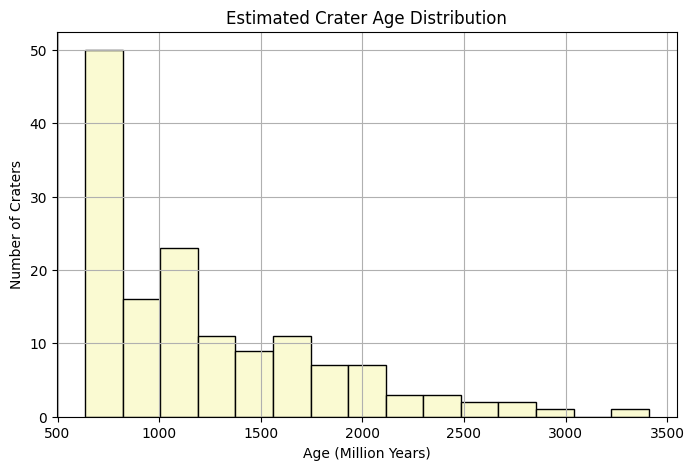

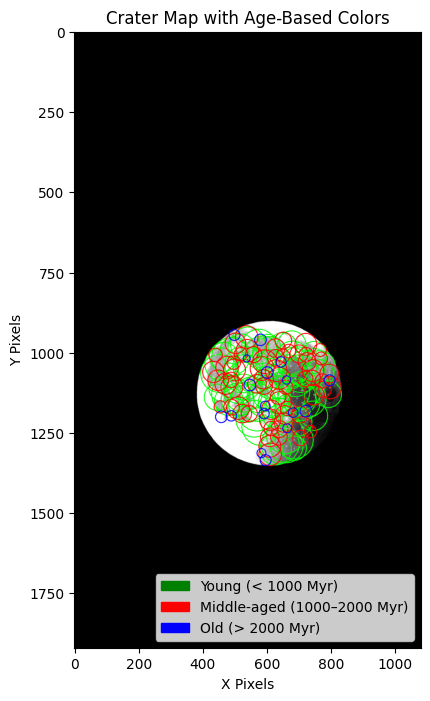

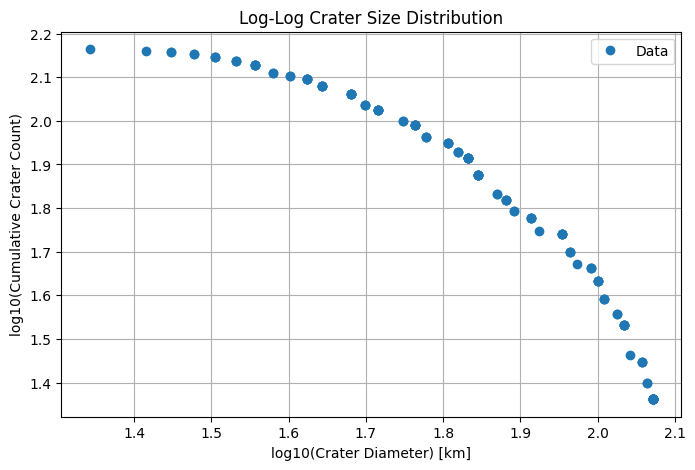

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import exposure, feature
import matplotlib.patches as mpatches
from scipy.stats import linregress

# Path to your uploaded video
video_path = "/moon.mp4"

# Open the video file
cap = cv2.VideoCapture(video_path)

"""
Attempt to open the video file for analysis.
This is the initial step to ensure data is accessible.
"""
if not cap.isOpened():
    print("Error: Cannot open video file.")
else:
    """
    Retrieve the total number of frames in the video and select the middle frame.
    This is based on the fact that it is clear and focused.
    """
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    print(f"Total frames in video: {total_frames}")

    best_frame_index = total_frames // 2
    cap.set(cv2.CAP_PROP_POS_FRAMES, best_frame_index)
    ret, frame = cap.read()

    """
    Convert the selected frame to grayscale for simplified processing.
    This removes color and focuses on intensity patterns.
    """
    if not ret:
        print("Error reading frame.")
    else:
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        """
        Enhance contrast using intensity rescaling.
        This makes surface features more distinct by stretching the brightness range.
        """
        p2, p98 = np.percentile(gray, (2, 98))
        enhanced = exposure.rescale_intensity(gray, in_range=(p2, p98))

        """
        Detect edges using the Canny method.
        Highlights sharp transitions which may correspond to crater boundaries.
        """
        edges = feature.canny(enhanced, sigma=2)

        """
        Apply blur to reduce noise before circle detection.
        Noise reduction improves accuracy of circle transform.
        """
        img_blur = cv2.medianBlur(enhanced, 5)

        """
        Use circle transform to detect craters.
        Circles represent potential craters based on their circular shape.
        """
        circles = cv2.HoughCircles(
            img_blur,
            cv2.HOUGH_GRADIENT,
            dp=1.2, minDist=20,
            param1=50, param2=30,
            minRadius=5, maxRadius=60
        )

        crater_diameters = []
        crater_ages = []

        # Create an RGB image for crater overlay
        crater_image = cv2.cvtColor(enhanced, cv2.COLOR_GRAY2BGR)

        if circles is not None:
            """
            If craters are detected, estimate their sizes and ages.
            Use an inverse model to estimate crater age based on size.
            """
            circles = np.uint16(np.around(circles[0, :]))
            for (x, y, r) in circles:
                diameter_km = 2 * r  # Approximate: 1 px = 1 km
                age_myr = 75000 / diameter_km  # Crater age in millions of years (found method online using range of 70k-80k)

                crater_diameters.append(diameter_km)
                crater_ages.append(age_myr)

                """
                Color-code the craters based on age for visualization.
                Green = Young, Red = Middle-aged, Blue = Old.
                """
                if age_myr > 2000:
                    color = (255, 0, 0)       # Blue = Old
                elif age_myr > 1000:
                    color = (0, 0, 255)       # Red = Middle-aged
                else:
                    color = (0, 255, 0)       # Green = Young

                cv2.circle(crater_image, (x, y), r, color, 2)              # Draw circle
                cv2.circle(crater_image, (x, y), 2, (255, 255, 255), 1)    # Draw center point

            """
            Convert lists to NumPy arrays for efficient computation and plotting.
            """
            crater_diameters = np.array(crater_diameters)
            crater_ages = np.array(crater_ages)

            """
            Plot a histogram of estimated crater ages.
            Provides insight into the age distribution of the surface.
            """
            plt.figure(figsize=(8, 5))
            plt.hist(crater_ages, bins=15, color='lightgoldenrodyellow', edgecolor='black')
            plt.title("Estimated Crater Age Distribution")
            plt.xlabel("Age (Million Years)")
            plt.ylabel("Number of Craters")
            plt.grid(True)
            plt.show()

            """
            Display the crater map with age-based coloring.
            A legend explains the color-coding scheme used.
            """
            plt.figure(figsize=(10, 8))
            plt.imshow(cv2.cvtColor(crater_image, cv2.COLOR_BGR2RGB))
            plt.title("Crater Map with Age-Based Colors")
            plt.xlabel("X Pixels")
            plt.ylabel("Y Pixels")

            red_patch = mpatches.Patch(color='blue', label='Old (> 2000 Myr)')
            yellow_patch = mpatches.Patch(color='red', label='Middle-aged (1000–2000 Myr)')
            green_patch = mpatches.Patch(color='green', label='Young (< 1000 Myr)')
            plt.legend(handles=[green_patch, yellow_patch, red_patch], loc='lower right')

            plt.show()

            """
            Power-law analysis:
            Create a log-log plot of the cumulative crater size distribution.
            This is used in planetary science to assess surface aging, impact frequency, and statistical trends.
            """
            sorted_diameters = np.sort(crater_diameters)
            cumulative_counts = np.array([np.sum(sorted_diameters >= d) for d in sorted_diameters])

            log_d = np.log10(sorted_diameters)
            log_n = np.log10(cumulative_counts)

            plt.figure(figsize=(8, 5))
            plt.plot(log_d, log_n, 'o', label='Data')
            plt.title("Log-Log Crater Size Distribution")
            plt.xlabel("log10(Crater Diameter) [km]")
            plt.ylabel("log10(Cumulative Crater Count)")
            plt.legend()
            plt.grid(True)
            plt.show()

        else:
            """
            If no craters are detected, notify.
            """
            print("No craters detected.")

# Release the video resource after processing
cap.release()

- We observe that the number of craters as a function of diameter does not follow a clear pattern such as a power-law since this log-log plot would be linear. For my data which resembles something very similar to -e^x , would symbolize no  statistical trend.

- From the histogram of crater ages, we can see that the lunar surface contains craters dating back as far as approximately 3.5 billion years. This aligns with expectations for the lunar maria, which are estimated to be around 3 to 3.5 billion years old.

- Geologically, my data suggests a somewhat younger surface than what is typically reported in scientific literature. This is likely due to the relatively low number of detected craters, which may result from limited detection accuracy. Contributing factors include the constraints of my available technology and my own experience level with image analysis.

- Several sources of error could have affected the results. These include inaccurate crater detection or measurement by the Python, improper contrast enhancement that reduced crater visibility, and potential coding oversights. Even minor programming errors can significantly impact the accuracy of crater identification and analysis.